In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt 
%matplotlib inline

2023-05-05 23:43:10.793128: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 23:43:10.827183: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-05 23:43:10.830313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 23:43:11.650403: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
htc = pd.read_csv('./htc_test.csv')

In [3]:
temp = pd.read_csv('./temp_test.csv')

In [4]:
type(htc)

pandas.core.frame.DataFrame

In [5]:
x = temp.to_numpy()
y = htc.to_numpy()

In [6]:
x_train = x[:900000]
y_train = y[:900000]

x_train_copy = x_train.copy()

x_valid = x[900000:910000]
y_valid = y[900000:910000]

x_test = x[910000:920000]
y_test = y[910000:920000]

In [7]:
temp = None
htc = None
# clear the dataframes. Not needed anymore

In [8]:
x_train.shape

(900000, 120)

In [9]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)
x_test = scaler.transform(x_test)

In [10]:
x_train_seq = x_train.reshape(-1, 120, 1)
x_valid_seq = x_valid.reshape(-1, 120, 1)
x_test_seq = x_test.reshape(-1, 120, 1)

In [13]:
y_train_seq = y_train.reshape(-1, 120, 1)
y_valid_seq = y_valid.reshape(-1, 120, 1)
y_test_seq = y_test.reshape(-1, 120, 1)

In [14]:
x_train_seq.shape

(900000, 120, 1)

In [15]:
# scaler_y = StandardScaler()
# scaler_y.fit(y_train)
# y_train = scaler_y.transform(y_train)
# y_valid = scaler_y.transform(y_valid)
# y_test = scaler_y.transform(y_test)

In [16]:
model = keras.models.Sequential([
    keras.layers.LSTM(50, return_sequences=True, input_shape=(120, 1)),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(1))
])

2023-05-05 23:44:03.532989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 23:44:03.535249: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 23:44:03.536529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [17]:
model.compile(loss='mse', optimizer='adam', metrics=[
    keras.metrics.RootMeanSquaredError(),
    keras.metrics.MeanAbsolutePercentageError()
])

In [19]:
history = model.fit(x_train_seq, y_train_seq, epochs=3, validation_data=(x_valid_seq, y_valid_seq))

2023-05-05 23:44:19.756378: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 432000000 exceeds 10% of free system memory.


Epoch 1/3


2023-05-05 23:44:20.356209: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 432000000 exceeds 10% of free system memory.


13345/28125 [=============>................] - ETA: 21:16 - loss: 1452960.0000 - root_mean_squared_error: 1205.3870 - mean_absolute_percentage_error: 25.4639

In [36]:
model.save('LSTM_2.h5')

In [37]:
model.evaluate(x_test_seq, y_test_seq)

313/313 [==============================] - 11s 36ms/step - loss: 45657.3477 - root_mean_squared_error: 213.6758 - mean_absolute_percentage_error: 3.7138


[45657.34765625, 213.6758270263672, 3.7137715816497803]

In [42]:
y_train_seq[indx].reshape(1,120).shape

(1, 120)

In [56]:
x_train_seq[0:3].shape

(3, 120, 1)

In [57]:
y_train_seq.shape

(100000, 120, 1)

In [108]:
p = model.predict(x_train_seq[0:3])

2023-05-05 23:42:15.705071: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-05 23:42:15.707382: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-05 23:42:15.708689: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 612ms/step


In [109]:
p.shape

(3, 120, 1)

In [110]:
p[0]

array([[ 2.6774926],
       [10.421473 ],
       [29.70935  ],
       [42.777218 ],
       [44.822636 ],
       [45.106213 ],
       [45.15028  ],
       [45.15736  ],
       [45.15857  ],
       [45.158817 ],
       [45.158886 ],
       [45.1589   ],
       [45.15891  ],
       [45.158913 ],
       [45.158913 ],
       [45.158913 ],
       [45.158913 ],
       [45.15891  ],
       [45.158905 ],
       [45.158905 ],
       [45.1589   ],
       [45.1589   ],
       [45.1589   ],
       [45.158913 ],
       [45.15892  ],
       [45.15892  ],
       [45.158928 ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.158936 ],
       [45.158936 ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.158936 ],
       [45.15893  ],
       [45.15893  ],
       [45.15893  ],
       [45.15

1/1 [==============================] - 0s 31ms/step


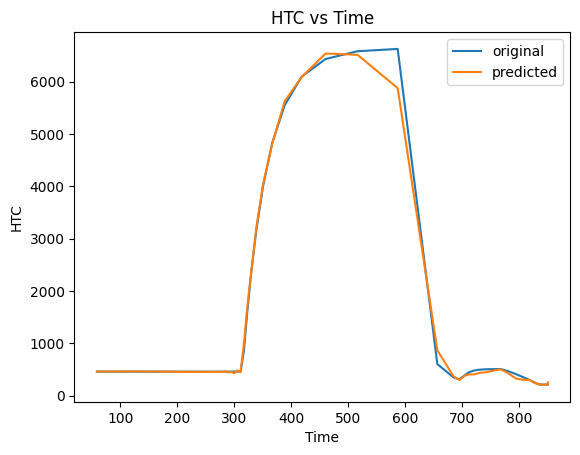

In [104]:
indx = 990
# x = np.arange(0, 120, 1)
x = x_train_copy[indx]
# print(x)
plt.plot(x, y_train_seq[indx], label='original')
plt.plot(x, model.predict(x_train_seq[indx:indx+1])[0][:, -1], label='predicted')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Time")
plt.ylabel("HTC")
plt.title("HTC vs Time")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()